## Task 2 - Curve Fitting + Find Peak

In [1]:
import pandas as pd
import math
import numpy as np
from matplotlib import pyplot as plt
from scipy import signal 

### Step 1 : original scatter  plot

In [2]:
# 3 dataframes => 304 rows × 64 columns (-15 ~ -15)
df1 = pd.read_excel('../Requirements/EC1-4.xlsx', sheet_name=None, usecols='A:BL')['DATA']
df2 = pd.read_excel('../Requirements/EC1-4.xlsx', sheet_name=None, usecols='BN:DY')['DATA']
df3 = pd.read_excel('../Requirements/EC1-4.xlsx', sheet_name=None, usecols='ED:GO')['DATA']

# Definite Value
_Freq = df1.iloc[1, 1:].tolist() # 63 columns (1000 ~ 5000000)
_W = (2 * (math.pi) * df1.iloc[1, 1:]).tolist() # (6283.185307179586 ~　31415926.535897933)
_V = df1.iloc[2:154, 0].tolist() # 152 (-15 ~ 15) 
_Area = 1 * 1e-3

# 152 rows × 63 columns 
G1 = df1.iloc[2:154, 1:].reset_index(drop=True)
G2 = df2.iloc[2:154, 1:].reset_index(drop=True)
G3 = df3.iloc[2:154, 1:].reset_index(drop=True)

In [3]:
# Gp_W data results from Task1
for i in range(1):#len(_V) #90, 100 ,1
    Gp_W = []
    _each_W = []
    for j in range(len(_Freq)): #len(_Freq)        
        Cm = G1.iat[i, j] / _Area
        Gm = G2.iat[i, j] / _Area
        Cox = (G1.iloc[:,j].max()) / _Area

        Gp_W.append( float( (_W[j] * (Cox ** 2) * Gm) / ((Gm ** 2) + (_W[j] ** 2) * (((Cm - Cox) ** 2))) ))
        _each_W.append(float(_W[j]))  

        Gp_W_Results = {
            "W": _each_W,
            "Gp_W": Gp_W,    
        }    
df = pd.DataFrame(Gp_W_Results) 
df.head()

,W,Gp_W
0,6283.185307,5.511036e-09
1,7208.428326,5.761544e-09
2,8269.922218,3.834906e-09
3,9487.729194,4.926960e-09
4,10884.864562,5.951457e-09


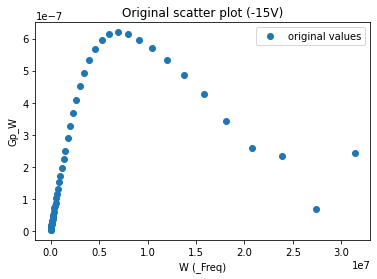

In [4]:
# Scatter plot (Print one Volt = -15V)
x = np.array(df["W"])        
y = np.array(df["Gp_W"])      

plt.plot(x, y, 'o', label='original values') 
plt.legend(loc=1)

plt.title(f'Original scatter plot (-15V)')
plt.ylabel("Gp_W") # y label
plt.xlabel("W (_Freq)") # x label
plt.show()

### Step 2 : Curve Fitting + Find Peak

(Poly Order 1 - Peak-Axis) X : [], Y : []
(Poly Order 2 - Peak-Axis) X : [13777963.52032792], Y : [6.12497451e-07]
(Poly Order 3 - Peak-Axis) X : [9124366.30486251], Y : [6.53359327e-07]
(Poly Order 4 - Peak-Axis) X : [7953199.41316016], Y : [6.38364539e-07]
(Poly Order 5 - Peak-Axis) X : [7953199.41316016], Y : [6.14105991e-07]
(Poly Order 6 - Peak-Axis) X : [6932357.72993207], Y : [6.28959883e-07]
(Poly Order 7 - Peak-Axis) X : [6932357.72993207], Y : [6.2892656e-07]
(Poly Order 8 - Peak-Axis) X : [6932357.72993207], Y : [6.17167432e-07]
(Poly Order 9 - Peak-Axis) X : [6932357.72993207], Y : [6.20344162e-07]


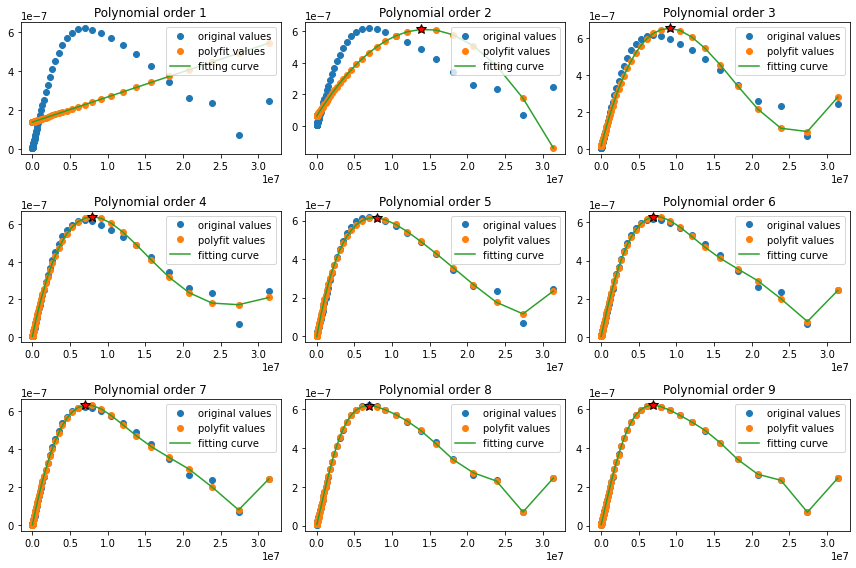

In [5]:
plt.figure(figsize = (12, 8))

x = np.array(df["W"])        
y = np.array(df["Gp_W"])      

for i in range(1, 10, 1): 
    p = np.polyfit(x, y, i) # i : Degree of the fitting polynomial
    yp = np.polyval(p, x)
    plt.subplot(3, 3, i)   
    
    plt.plot(x, y, 'o', label='original values') # original scatter plot (Blue points)  

    # Draw fitting Curve (Green Curve, actually orange dot generates curve)
    plt.plot(x, np.polyval(p, x), 'o', label='polyfit values') # orange dot
    plt.plot(x, np.polyval(p, x), label='fitting curve') # Connected orange dot by (green curve)
    plt.legend(loc=1)
    # find peak (red star)
    plt.plot(x[signal.argrelextrema(yp,np.greater)[0]], yp[signal.argrelextrema(yp, np.greater)],'*',markersize=10, mfc='red', mec='k')
    print("(Poly Order " + str(i) + " - Peak-Axis) X : " + str(x[signal.argrelextrema(yp,np.greater)[0]]) + ", Y : " + str(yp[signal.argrelextrema(yp, np.greater)]))
        
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

### Enhance Accuracy of Peak coordinate

(Poly Order 9 - Peak-Axis) X : [6986203.9298829], Y : [6.20243581e-07]


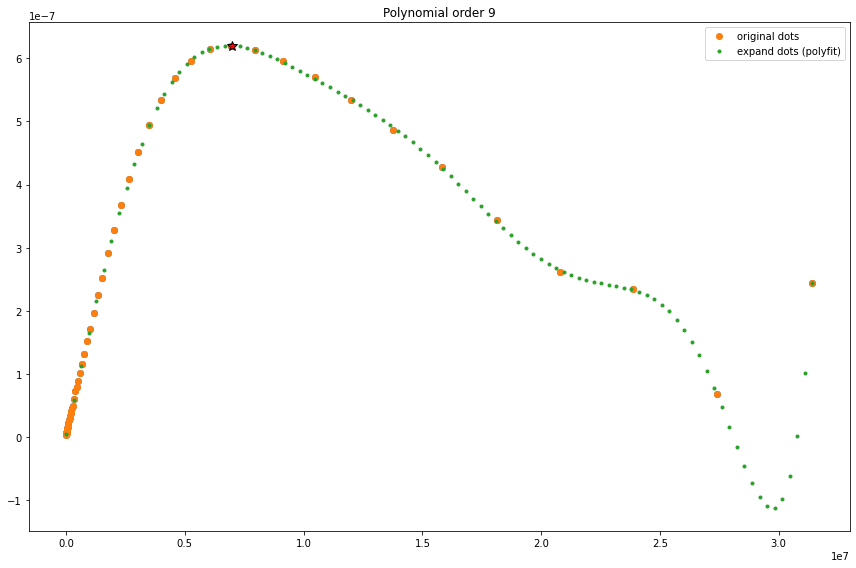

In [6]:
# By add more dots on fitting curve 
# For example : add original dots to 100 dots  & draw polynomial deg = 9 fitting curve
expandDotNums = 100 

x = np.array(df["W"])        
y = np.array(df["Gp_W"]) 

plt.figure(figsize = (12, 8))
i = 9
p = np.polyfit(x, y, i) # i : Degree of the fitting polynomial

# Expand dots & evaluate the values for a polynomial        
x_New = np.linspace(min(x),max(x), expandDotNums)
yp_New = np.polyval(p, x_New)

plt.plot(x, y, 'o') # original scatter plot (Blue points)  

# Draw fitting Curve (Green Curve, actually orange dot generates curve)
plt.plot(x, y, 'o', label='original dots') # (original) orange dot
plt.plot(x_New, yp_New, 'o', markersize=3, label='expand dots (polyfit)') # green dot
#plt.plot(x_New, yp_New,) # Connected orange dot by (green curve)
plt.legend(loc=1)

# find peak (red star)
plt.plot(x_New[signal.argrelextrema(yp_New, np.greater)[0]], yp_New[signal.argrelextrema(yp_New, np.greater)],'*',markersize=10, mfc='red', mec='k')
print("(Poly Order " + str(i) + " - Peak-Axis) X : " + str(x_New[signal.argrelextrema(yp_New,np.greater)[0]]) + ", Y : " + str(yp_New[signal.argrelextrema(yp_New, np.greater)]))

plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

(Poly Order 1 - Peak-Axis) X : [], Y : []
(Poly Order 2 - Peak-Axis) X : [14471870.50698639], Y : [6.13765488e-07]
(Poly Order 3 - Peak-Axis) X : [9012328.53845686], Y : [6.53433439e-07]
(Poly Order 4 - Peak-Axis) X : [7969424.08877228], Y : [6.3836641e-07]
(Poly Order 5 - Peak-Axis) X : [7592470.67322364], Y : [6.14788001e-07]
(Poly Order 6 - Peak-Axis) X : [7322320.72541378], Y : [6.30134204e-07]
(Poly Order 7 - Peak-Axis) X : [7325462.00387668], Y : [6.30133662e-07]
(Poly Order 8 - Peak-Axis) X : [6879400.46214412], Y : [6.17183938e-07]
(Poly Order 9 - Peak-Axis) X : [6825998.72827473], Y : [6.2042343e-07]


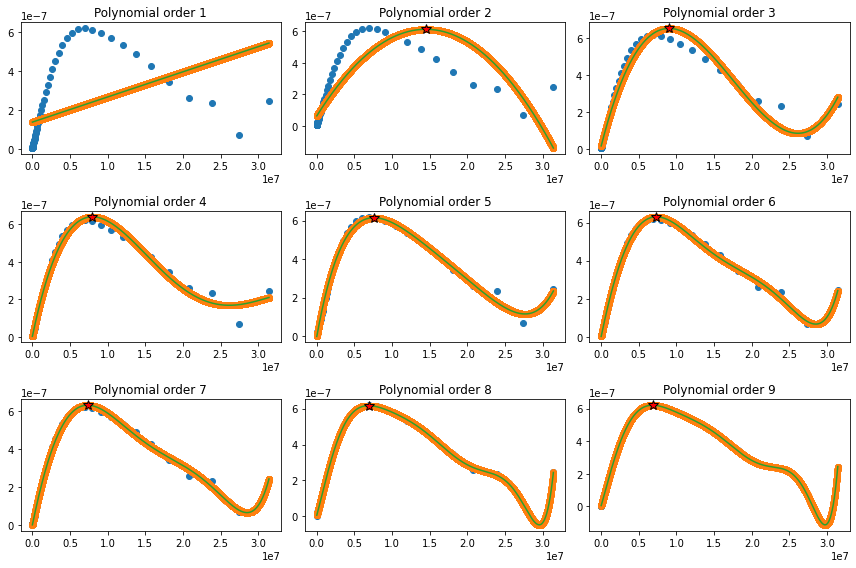

In [7]:
# 1 - 9 polynomial order degree
expandDotNums = 10000 

x = np.array(df["W"])        
y = np.array(df["Gp_W"]) 

plt.figure(figsize = (12, 8))
for i in range(1, 10, 1): 
    p = np.polyfit(x, y, i) # i : Degree of the fitting polynomial
    
    # Expand dots & evaluate the values for a polynomial        
    x_New = np.linspace(min(x),max(x), expandDotNums)
    yp_New = np.polyval(p, x_New)

    plt.subplot(3, 3, i)   
    
    plt.plot(x, y, 'o') # original scatter plot (Blue points)  

    # Draw fitting Curve (Green Curve, actually orange dot generates curve)
    plt.plot(x_New, yp_New, 'o') # orange dot
    plt.plot(x_New, yp_New,) # Connected orange dot by (green curve)
    
    # find peak (red star)
    plt.plot(x_New[signal.argrelextrema(yp_New, np.greater)[0]], yp_New[signal.argrelextrema(yp_New, np.greater)],'*',markersize=10, mfc='red', mec='k')
    print("(Poly Order " + str(i) + " - Peak-Axis) X : " + str(x_New[signal.argrelextrema(yp_New,np.greater)[0]]) + ", Y : " + str(yp_New[signal.argrelextrema(yp_New, np.greater)]))
        
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()